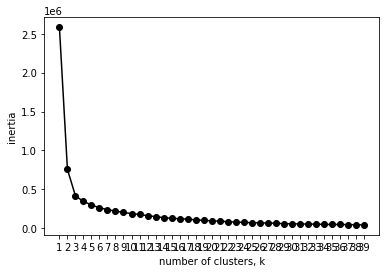

In [278]:
import pandas as pd
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
#load data
xls = pd.ExcelFile('DATA SAMPLES//data.xlsx')
df1 = pd.read_excel(xls, 'learner_static')
df2 = pd.read_excel(xls, 'learning_style')
learner_data=pd.merge(df1,df2,how='inner',on='Sid')
learner_data['Active_Reflective']=''
learner_data['Sensitive_Intutive']=''
learner_data['Visual_Verbal']=''
learner_data['Global_Sequential']=''
columns=list(learner_data.columns) 
columns
#check wether value is dominant
def isDominant(score):
    val=int(score)
    score_min=val-50
    if score_min>0:
        return True
    else:
        return False

def activeOrReflective(score):
    if isDominant(score):
        return 1
    else:
        return 0
    
def sensitiveOrIntutive(score):
    if isDominant(score):
        return '1'
    else:
        return '0'
def visualOrVerbal(score):
    if isDominant(score):
        return '1'
    else:
        return '0'
def Global_Sequential(score):
    if isDominant(score):
        return '1'
    else:
        return '0'
learner_data['Active_Reflective'] = learner_data['Active'].apply(lambda x: activeOrReflective(x))
learner_data['Sensitive_Intutive'] =learner_data['Sensitive'].apply(lambda x: sensitiveOrIntutive(int(x)))
learner_data['Visual_Verbal'] =learner_data.Visual.apply(lambda x: visualOrVerbal(x))
learner_data['Global_Sequential'] =learner_data.Global.apply(lambda x: Global_Sequential(x))
Background=list(learner_data['BackgroundKnowledge'].unique())
Qualification=list(learner_data['Qualification'].unique())

def findBK(bk):
    return Background.index(bk)*100
def findQual(qual):
    return Qualification.index(qual)
learner_data['BackgroundKnowledge'] =learner_data.apply(lambda x: findBK(x['BackgroundKnowledge']), axis=1)
learner_data['Qualification'] =learner_data.apply(lambda x: findQual(x['Qualification']), axis=1)

x_learner_data=learner_data[['BackgroundKnowledge','Active','Sensitive','Visual',]]
ks = range(1, 40)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(x_learner_data)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [279]:
kmeans5 = KMeans(n_clusters=40, random_state=42)
k_predictor= kmeans5.fit(x_learner_data)
x_learner_data['class']=k_predictor.predict(x_learner_data)

C:\Users\raz\anaconda3\envs\leadserver\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [280]:
x_learner_data

,BackgroundKnowledge,Active,Sensitive,Visual,class
0,0,70,40,60,34
1,0,60,70,20,37
2,100,47,62,49,2
3,200,30,65,81,22
4,0,78,34,23,0
...,...,...,...,...,...
295,200,66,84,87,25
296,200,44,21,77,24
297,0,84,39,14,0
298,200,54,68,17,20


In [281]:
x_learner_data['class'].value_counts()

13    17
3     16
2     16
5     14
0     13
15    13
28    13
11    12
12    12
1     11
6     10
35    10
7      9
26     9
20     9
18     9
24     8
34     7
8      7
14     7
23     6
4      5
10     5
19     5
25     5
32     5
37     5
38     4
21     4
22     4
9      4
31     4
33     4
27     3
29     3
30     3
36     3
16     2
17     2
39     2
Name: class, dtype: int64

In [293]:
x_learner_data[x_learner_data['class']==13].index.tolist() 

[12,
 14,
 42,
 74,
 83,
 131,
 132,
 136,
 149,
 161,
 175,
 182,
 185,
 194,
 205,
 218,
 236]

In [307]:
#find class of input data
#find corelation macthes
#find top rated materials on particular topic
#sort by date
learner_data.iloc[x_learner_data[x_learner_data['class']==13].index.tolist() ].Sid.tolist()

[13,
 15,
 45,
 75,
 84,
 132,
 133,
 137,
 150,
 162,
 176,
 183,
 186,
 195,
 206,
 219,
 237]

In [316]:
xls = pd.ExcelFile('DATA SAMPLES//LearnerLog_InitialLoad.xlsx')
log_df=pd.DataFrame()
sheet_to_df_map={}
for sheet_name in xls.sheet_names:
    log_df = pd.concat([log_df, xls.parse(sheet_name)])


In [318]:
log_df.head()

,SID,Materials_Visited,Material_Visited_Time(Mins),Material_Ratings
0,1,"M1,M6,M7","6,20,12","2,5,3"
1,2,M23,23,4
2,3,"M2,M9","35,16","4,3"
3,4,"M11,M8,M20","23,17,64","3,2,5"
4,5,M13,40,4


In [325]:
'M1,M6,M7'.split(',')
log_df[['Materials_Visited']].apply(lambda x:x.split(','))

AttributeError: 'Series' object has no attribute 'split'

In [328]:
log_df[['Materials_Visited','Material_Visited_Time(Mins)','Material_Ratings']]

,Materials_Visited,Material_Visited_Time(Mins),Material_Ratings
0,"M1,M6,M7","6,20,12","2,5,3"
1,M23,23,4
2,"M2,M9","35,16","4,3"
3,"M11,M8,M20","23,17,64","3,2,5"
4,M13,40,4
...,...,...,...
135,"M305,M301","23,36","3,4"
136,"M307,M302,M303","7,22,11","1,2,2"
137,"M305, M311,M312","23,6,8","4, 3, 3"
138,"M310,M304,M306","14,20,31","2,3,4"


In [371]:
log_df=log_df.apply((lambda x: x.split(',') if(type(x)==str) else x) )
log_df

,SID,Materials_Visited,Material_Visited_Time(Mins),Material_Ratings
0,1,"M1,M6,M7","6,20,12","2,5,3"
1,2,M23,23,4
2,3,"M2,M9","35,16","4,3"
3,4,"M11,M8,M20","23,17,64","3,2,5"
4,5,M13,40,4
...,...,...,...,...
135,136,"M305,M301","23,36","3,4"
136,137,"M307,M302,M303","7,22,11","1,2,2"
137,138,"M305, M311,M312","23,6,8","4, 3, 3"
138,139,"M310,M304,M306","14,20,31","2,3,4"


In [375]:
type(log_df.iloc[0,2])

str

In [369]:
'4,5,6'.split(',')

['4', '5', '6']

In [364]:
x='M1,m3,33'
f=lambda x: x.split(',') if(type(x)==str) else x

In [365]:
lista=f(x)

In [366]:
lista

['M1', 'm3', '33']

In [360]:
type(x)

str

In [363]:
(type(x)==str)

True